Giovanna Nascimento Antonieti    CP3013383

Daniel Brai Gonzales Marcos      CP3013375

# Base de dados

<img src="./edr.png" />

In [1]:
!pip3 install  mysql-connector-python pandas seaborn matplotlib
import pandas as pd
import seaborn as sns
import mysql.connector as sql
import matplotlib.pyplot as plt

You should consider upgrading via the 'G:\Documents\especializacao\env_analise\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
db_connection = sql.connect(host='database-1.cpmh8v6wxjb0.us-east-1.rds.amazonaws.com', database='northwind', user='admin', password='batatinha1234')

# Consultas

## 1. Região das vendas

In [22]:
sales_per_region =  pd.read_sql('Select r.RegionDescription as `Região`, t.TerritoryDescription as `Territorio`,  \
                                CONCAT(e.FirstName," ", e.LastName) as `Vendedor`, o.ShipCountry as `Pais de destino`, \
                                o.Freight as `Frete`, o.OrderDate as `Data do pedido`, o.ShippedDate as `Data de entrega` \
                                from Orders o inner join Employees e on o.EmployeeID=e.EmployeeID \
                                inner join EmployeeTerritories et on e.EmployeeID=et.EmployeeID \
                                inner join Territories t on et.TerritoryID=t.TerritoryID \
                                inner join Region r on r.RegionID=t.RegionID  ', con=db_connection)

In [23]:
sales_per_region

,Região,Territorio,Vendedor,Pais de destino,Frete,Data do pedido,Data de entrega
0,Eastern ...,Wilton ...,Nancy Davolio,Austria,140.51,1996-07-17,1996-07-23
1,Eastern ...,Wilton ...,Nancy Davolio,Finland,136.54,1996-08-01,1996-08-02
2,Eastern ...,Wilton ...,Nancy Davolio,Italy,26.93,1996-08-07,1996-08-09
3,Eastern ...,Wilton ...,Nancy Davolio,Germany,76.83,1996-08-20,1996-08-26
4,Eastern ...,Wilton ...,Nancy Davolio,Brazil,1.35,1996-08-28,1996-09-02
...,...,...,...,...,...,...,...
3955,Southern ...,Tampa ...,Janet Leverling,Switzerland,48.22,1998-04-22,1998-04-28
3956,Southern ...,Tampa ...,Janet Leverling,Brazil,8.34,1998-04-24,1998-05-04
3957,Southern ...,Tampa ...,Janet Leverling,Brazil,67.26,1998-04-27,1998-05-01
3958,Southern ...,Tampa ...,Janet Leverling,UK,4.13,1998-04-29,1998-05-01


## 2. Número de pedidos de cada consumidor

In [20]:
number_sales_per_customer =  pd.read_sql('select  x.`Quantidade de compras`, c.CompanyName as `Empresa` from \
                                        (select count(*) as `Quantidade de compras`, c.CustomerID from Orders o \
                                        inner join Customers c on o.CustomerID=c.CustomerID group by c.CustomerID ) x \
                                        inner join Customers c on c.CustomerID=x.CustomerId \
                                        order by `Quantidade de compras` desc ', con=db_connection)

In [21]:
number_sales_per_customer

,Quantidade de compras,Empresa
0,31,Save-a-lot Markets
1,30,Ernst Handel
2,28,QUICK-Stop
3,19,Hungry Owl All-Night Grocers
4,19,Folk och f HB
...,...,...
84,3,Blido Comidas preparadas
85,3,The Cracker Box
86,2,GROSELLA-Restaurante
87,2,Lazy K Kountry Store


## 3. Valor médio das vendas por vendedor

In [18]:
avg_sales_employee = pd.read_sql('SELECT Format(x.`Valor vendas médias`,2) as `Valor vendas médias`, \
                                  CONCAT(e.FirstName," ", e.LastName) as `Vendedor` from \
                                  (SELECT  e.EmployeeID, AVG(od.UnitPrice) as  `Valor vendas médias` \
                                  FROM Orders o inner join Employees e on o.EmployeeID=e.EmployeeID \
                                  inner join northwind.`Order Details` od on od.OrderID=o.OrderID group by e.EmployeeID) x \
                                  inner join Employees e on e.EmployeeID=x.EmployeeID ', con=db_connection)

In [19]:
avg_sales_employee

,Valor vendas médias,Vendedor
0,25.31,Nancy Davolio
1,28.69,Andrew Fuller
2,27.25,Janet Leverling
3,26.64,Margaret Peacock
4,23.48,Steven Buchanan
5,22.83,Michael Suyama
6,26.80,Robert King
7,24.00,Laura Callahan
8,31.59,Anne Dodsworth


## 4. 10 produtos com maior arrecadação

In [16]:
reveneu_per_product = pd.read_sql('Select p.ProductName as `Produto`, x.`Valor total das vendas por produto`, \
                                    s.CompanyName as `Fornecedor` from (select od.ProductID, \
                                     Format(sum((od.UnitPrice*od.Quantity)-od.Discount),2) \
                                     as `Valor total das vendas por produto` from Orders o inner join \
                                     northwind.`Order Details` od on o.OrderID = od.OrderID inner join Products p \
                                     on p.ProductID=od.ProductID group by od.ProductID) x  \
                                     inner join Products p on p.ProductID=x.ProductId \
                                     inner join Suppliers s on s.SupplierID=p.SupplierID \
                                     order by x.`Valor total das vendas por produto` desc limit 10', con=db_connection)

In [17]:
reveneu_per_product

,Produto,Valor total das vendas por produto,Fornecedor
0,Original Frankfurter grne Soe,"9,685.00",Plutzer Lebensmittelgromrkte AG
1,Sir Rodney's Scones,"9,636.00","Specialty Biscuits, Ltd."
2,Maxilaku,"9,500.00",Karkki Oy
3,Chef Anton's Cajun Seasoning,"9,424.80",New Orleans Cajun Delights
4,Scottish Longbreads,"9,362.50","Specialty Biscuits, Ltd."
5,Singaporean Hokkien Fried Mee,"9,332.40",Leka Trading
6,Mascarpone Fabioli,"9,171.20",Formaggi Fortini s.r.l.
7,Jack's New England Clam Chowder,"9,098.10",New England Seafood Cannery
8,Thringer Rostbratwurst,"87,736.40",Plutzer Lebensmittelgromrkte AG
9,Mishi Kobe Niku,"8,827.00",Tokyo Traders


## 5. Quantidade vendida vs preço unitário médio

In [14]:
mean_price_quantity = pd.read_sql('select p.ProductName as `Produto`, x.`Preço médio`, x.`Quantidade total vendida`  \
                                  from (select p.ProductID, format(avg(p.UnitPrice),2) as `Preço médio`,   \
                                        sum(od.Quantity) as `Quantidade total vendida` FROM Products p  \
                                        inner join northwind.`Order Details` od on p.ProductID = od.ProductID \
                                        group by p.ProductID) x inner join Products p on x.ProductID=p.ProductID \
                                  order by x.`Preço médio` desc', con=db_connection)

In [15]:
mean_price_quantity

,Produto,Preço médio,Quantidade total vendida
0,Mishi Kobe Niku,97.00,95.0
1,Jack's New England Clam Chowder,9.65,981.0
2,Rogede sild,9.50,508.0
3,Zaanse koeken,9.50,485.0
4,Teatime Chocolate Biscuits,9.20,723.0
...,...,...,...
72,Scottish Longbreads,12.50,799.0
73,Spegesild,12.00,548.0
74,Sir Rodney's Scones,10.00,1016.0
75,Aniseed Syrup,10.00,328.0


## 6. Produto mais vendido em cada categoria

In [24]:
product_per_category = pd.read_sql('SELECT cat_ext.CategoryName AS Categoria, \
                                    (SELECT p.ProductName FROM northwind.Categories cat_int \
                                    INNER JOIN northwind.Products p ON p.CategoryID = cat_int.CategoryID \
                                    INNER JOIN northwind.`Order Details` od on od.ProductID = p.ProductID \
                                    INNER JOIN northwind.Orders o ON od.OrderID = o.OrderID \
                                    WHERE cat_int.CategoryID = cat_ext.CategoryID \
                                    ORDER BY od.Quantity DESC LIMIT 1) AS  Produto \
                                    FROM northwind.Categories cat_ext', con=db_connection)

In [25]:
product_per_category

,Categoria,Produto
0,Beverages,Chartreuse verte
1,Condiments,Sirop d'rable
2,Confections,Schoggi Schokolade
3,Dairy Products,Raclette Courdavault
4,Grains/Cereals,Wimmers gute Semmelkndel
5,Meat/Poultry,Perth Pasties
6,Produce,Manjimup Dried Apples
7,Seafood,Jack's New England Clam Chowder


## 7. Os principais produtos mais vendidos em cada categoria em cada ano


In [29]:
product_per_category_per_year = pd.read_sql('SELECT c.CategoryName AS Categoria, p.ProductName AS Produto, \
                                            YEAR(o.OrderDate) as Ano, SUM(od.Quantity*od.UnitPrice) AS `Total de Vendas`,  \
                                            RANK() OVER( PARTITION BY YEAR(o.OrderDate) ORDER BY SUM(od.Quantity*od.UnitPrice ) \
                                            DESC ) `Posição` FROM northwind.Categories c INNER JOIN northwind.Products p \
                                            ON p.CategoryID = c.CategoryID INNER JOIN northwind.`Order Details` od \
                                            ON od.ProductID = p.ProductID INNER JOIN northwind.Orders o ON od.OrderID = o.OrderID\
                                            WHERE `Posição` <=3 \
                                            GROUP BY Categoria, Produto, Ano' , con=db_connection)

DatabaseError: Execution failed on sql 'SELECT c.CategoryName AS Categoria, p.ProductName AS Produto,                                             YEAR(o.OrderDate) as Ano, SUM(od.Quantity*od.UnitPrice) AS `Total de Vendas`,                                              RANK() OVER( PARTITION BY YEAR(o.OrderDate) ORDER BY SUM(od.Quantity*od.UnitPrice )                                             DESC ) `Posição` FROM northwind.Categories c INNER JOIN northwind.Products p                                             ON p.CategoryID = c.CategoryID INNER JOIN northwind.`Order Details` od                                             ON od.ProductID = p.ProductID INNER JOIN northwind.Orders o ON od.OrderID = o.OrderID                                            WHERE `Posição` <=3                                             GROUP BY Categoria, Produto, Ano': 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '( PARTITION BY YEAR(o.OrderDate) ORDER BY SUM(od.Quantity*od.UnitPrice )        ' at line 1

## 8. Vendas por estação

In [36]:
sales_per_season= pd.read_sql("SELECT Season AS 'Estação', COUNT(1) AS 'Total de Vendas' FROM ( \
                                SELECT case \
                                    when MONTH(OrderDate) between 1 and 3 then 'Spring'\
                                    when MONTH(OrderDate) between 4 and 6 then 'Summer' \
                                    when MONTH(OrderDate) between 7 and 9 then 'Autum' \
                                    when MONTH(OrderDate) between 10 and 12 then 'Winter' \
                                end AS Season \
                                FROM Orders \
                                ORDER BY Season DESC) AS OrdersBySeasons \
                                group by Season", con=db_connection)

In [38]:
sales_per_season

,Estação,Total de Vendas
0,Autum,173
1,Spring,274
2,Summer,181
3,Winter,202


## 9. Fornecedor com maior valor de produtos vendidos

In [44]:
sales_per_supplier = pd.read_sql("SELECT s.CompanyName AS 'Empresa', FORMAT(SUM(od.UnitPrice*od.Quantity), 2) AS 'Total de Vendas' \
                        FROM northwind.`Order Details` od INNER JOIN northwind.Products p ON od.ProductID = p.ProductID \
                        INNER JOIN northwind.Suppliers s ON p.SupplierID = s.SupplierID \
                        GROUP BY s.CompanyName ORDER BY SUM(od.UnitPrice)*SUM(od.Quantity) DESC", con=db_connection)

In [45]:
sales_per_supplier

,Empresa,Total de Vendas
0,Plutzer Lebensmittelgromrkte AG,"155,946.55"
1,"Pavlova, Ltd.","115,386.05"
2,Gai pturage,"126,582.00"
3,Aux joyeux ecclsiastiques,"163,135.00"
4,"Specialty Biscuits, Ltd.","48,793.80"
5,"G'day, Mate","69,636.60"
6,Formaggi Fortini s.r.l.,"51,082.50"
7,Norske Meierier,"46,897.20"
8,Forts d'rables,"66,266.70"
9,Leka Trading,"44,935.80"


# Visualizações

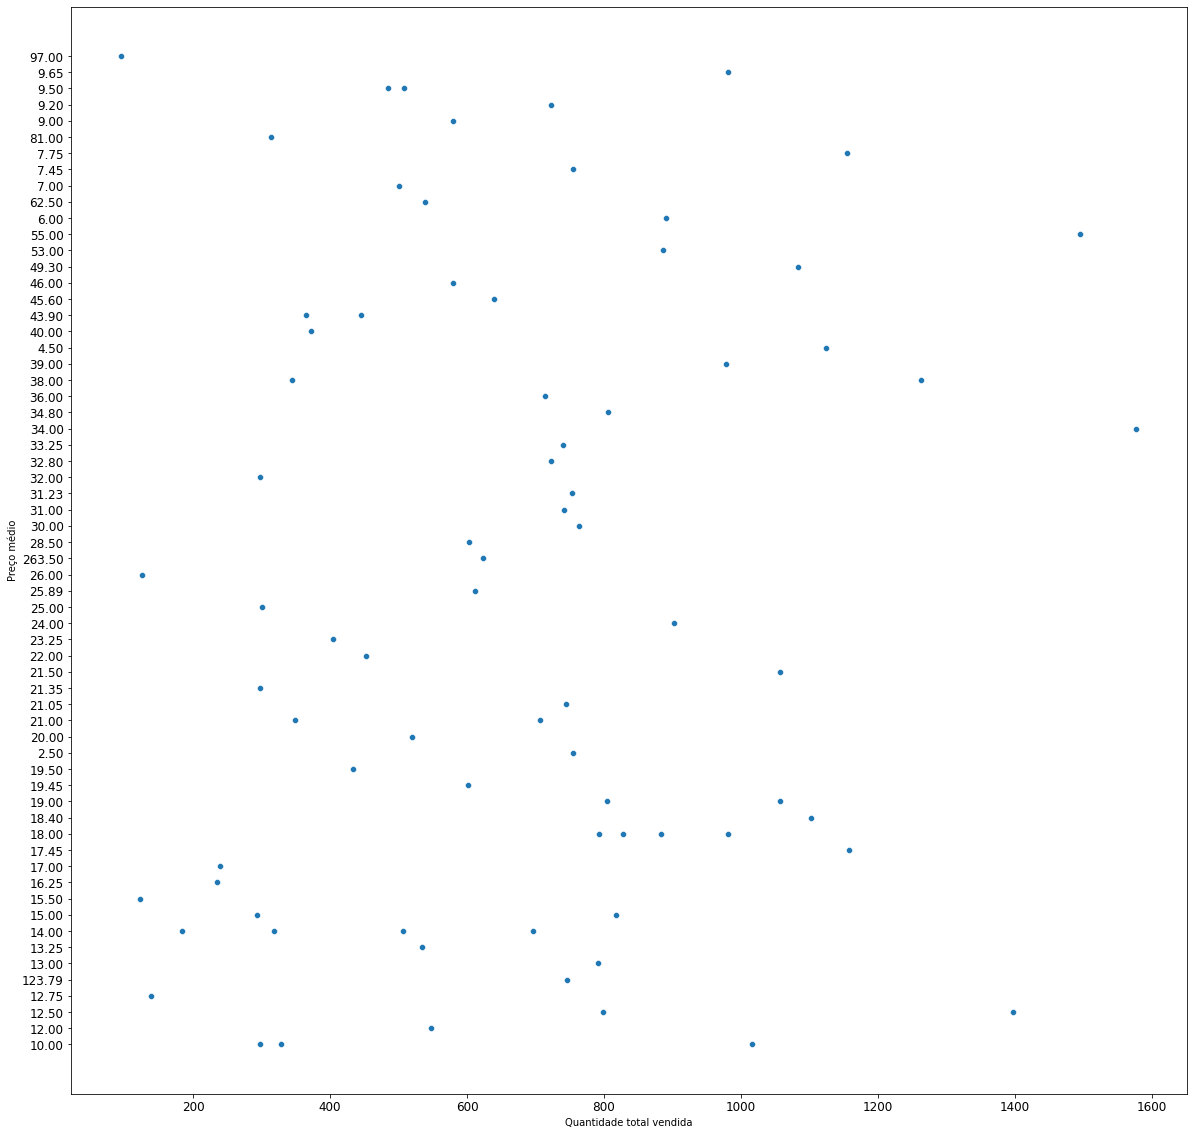

In [46]:
plt.figure(figsize=(20, 20))
g = sns.scatterplot(x=mean_price_quantity['Quantidade total vendida'], y=mean_price_quantity['Preço médio'])

## Número de pedidos dos dez consumidores mais assíduos

Text(0.5, 1.0, 'Top 10 empresas com mais pedidos')

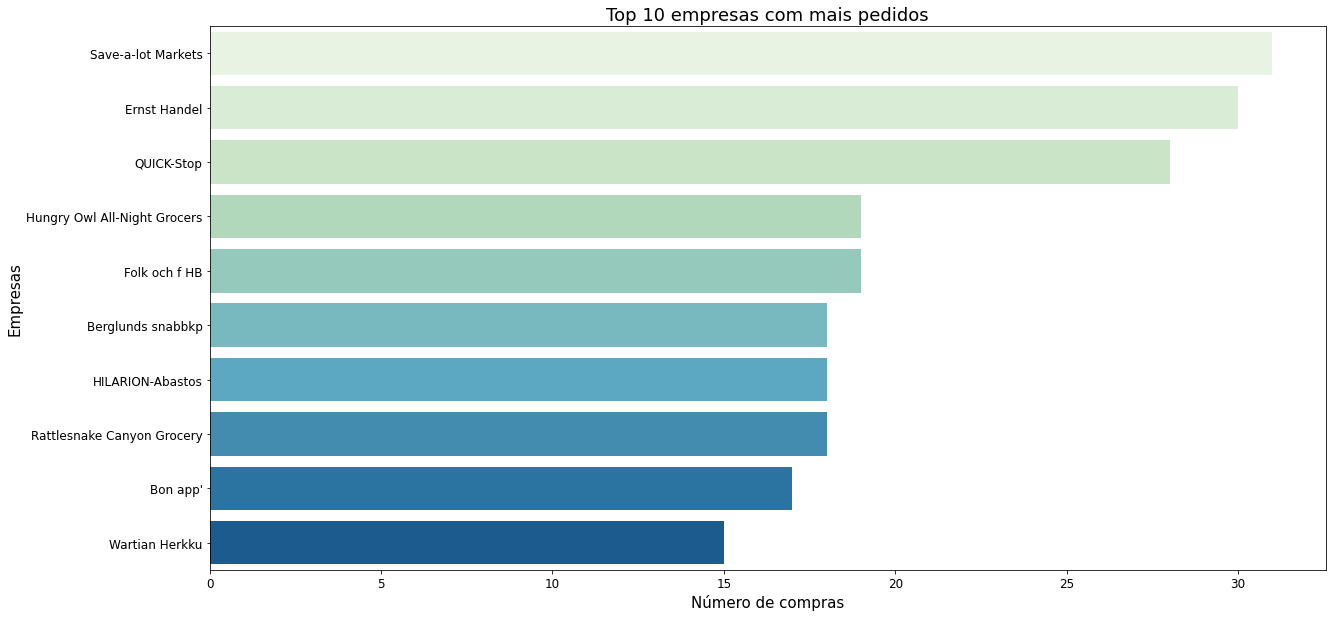

In [47]:
plt.figure(figsize=(20, 10))
sns.barplot(y = number_sales_per_customer.iloc[:10,:]['Empresa'], x=number_sales_per_customer.iloc[:10,:]['Quantidade de compras'], palette='GnBu')

plt.xlabel("Número de compras", fontsize=15)
plt.ylabel("Empresas", fontsize= 15)
plt.title('Top 10 empresas com mais pedidos', fontsize=18)